<a href="https://colab.research.google.com/github/andersknudby/Remote-Sensing/blob/master/GEE_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GEE Lab 1: Intro to Google Earth Engine
Developed by Genevieve George

## Introduction

In this lab we will learn how to work with the Google Earth Engine (GEE) python API in Google Colab. 
We will explore the GEE environment and how we can use it to access imagery. Then we will use it to explore and cloud-mask images and image collections.

**Files you need:** N/A

**Preparation:** You should be fine as long as you have followed the course so far.

## Steps

###| 1. Imports, installation, authentication, initialization

There are a couple of set-up features that are unique to using Google Earth Engine in Google Colaboratory. Make sure to read through each point to ensure you understand the steps going forward.


1.   GEE has a Javascript API, in which it has a built-in interactive map. In order to visualize our results in the python API, we need to use a special library to load interactive maps. For this course, we will use `geemap` which is based on `ipyleaflet` and `ipywidgets`.
2.   Unlike many libraries in Google Colab (like numpy, matplotlib, ee, etc.), the geemap library isn't pre-installed, so we need to install it every time we reconnect to an instance of Colab using the line `!pip install geemap`.
3.   We need to authenticate and initialize GEE every time we reconnect to an instance using the lines `ee.Authenticate()` and `ee.Initialize()`. Follow the resulting prompts to authenticate each instance.
4.   Unlike the Javascript API, the python API does not have a console that we can print to, to easily show information about our images and image collections. Instead we need to use `.getInfo()` to print and pprint (pretty printer) to organize the lines to make them easy to read. 

There are pros and cons to using both the Javascript API and the python API for Google Earth Engine. One of the major pros of working with the python API is that you don't need to learn Javascript to use it! Another pro is that you can combine GEE code with other remote sensing and raster python libraries to drastically increase how much you can do with the images. 

However, the documentation for the python API is much less complete than for the Javascript API and the console is not as interactive. 

In our case, the pros outweigh the cons since we have already been working in python, so let's get started!




In [ ]:
# Install geemap library so that we can use it to view images on an interactive map
## You may get a runtime warning - you can ignore that
!pip install geemap

In [ ]:
# Import the necessary libraries
import ee
import numpy as np
import geemap.eefolium as geemap
import pprint

# Set up a 'pretty printer' to print ...
pp = pprint.PrettyPrinter(depth=3)

In [ ]:
# Authenticate and initialize this instance of GEE in Google Colab
## Follow the prompts and fill in authentication code
ee.Authenticate()
ee.Initialize()

### | 2. Explore the geemap interface

When using the geemap library to examine imagery, there are a couple of quirks we need to get used to. 

The first quirk is that we need to first tell the computer that we want to plot things on a map by creating a map object.

The map object will be assigned to a variable and can have any name you want (just like other variables). Try to name it something that makes sense, like, `Map`.

In [ ]:
Map = geemap.Map()

Note that the above code doesn't produce anything - all we have done is assign a map object to a variable. If we want to explore our map, we need to call for it.

In [ ]:
Map

We can explore this map by zooming in and moving it around. It currently has two layers: Google Maps and its basemap, Open Street Map, but in order to play around with the layers, we need to explicitly tell our map that we want to do that.

In [ ]:
Map.addLayerControl()

Whenever we do something to our map in Google Colab, we need to call for it again. 

In [ ]:
Map

Now we have a little button in the top right corner that allows us to change the layers we see. Currently our only options are to toggle Google Maps on and off, but as we add more layers to our map, the `Map.addLayerControl()` function will be useful. 

Note that `Map` in this case is the variable we assigned our map object to. If you named your map object `My_cute_map_1` then you need to call `My_cute_map_1.addLayerControl()`.

###| 3. Access and filter an image collection

Google Earth Engine allows you to add any imagery from their [data catalog](https://developers.google.com/earth-engine/datasets). I encourage you to explore the datasets they have available. Their catalog does an excellent job of summarizing the data and providing example code for how to import the imagery into GEE.

To get started, let's import some Landsat imagery. Go to the [Landsat 8 Tier 1 dataset page](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR) to read the description of this data set and get more information about how to import Landsat 8.

In [ ]:
# Assign your image collection of choice to a variable

# The GEE data catalog provides the string used to code for each dataset
# For landsat 8, the string is "LANDSAT/LC08/C01/T1_SR"
Landsat8_collection = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")

# Similarly, to import the Landsat 7 surface reflectance collection, we use:
L7 = ee.ImageCollection("LANDSAT/LE07/C01/T1_SR")

Now we have stored the entire Landsat 8 collection in a variable. Let's get an idea of how many images that is (warning: this may take a while to run)

In [ ]:
print(Landsat8_collection.size().getInfo())

That code tells us that we have over a million individual Landsat tiles stored in our `Landsat8_collection` variable. That is more than we need, so let's filter our collection to only get images that are of interest to us. For now, let's concentrate on the area around uOttawa for summer 2020.

In [ ]:
# Create a point from coordinates
uOttawa = ee.Geometry.Point([-75.683187,45.423050]) 

# Filter the collection by location
L8_uOttawa = Landsat8_collection.filterBounds(uOttawa)

# Check how many images we have
print(L8_uOttawa.size().getInfo())

In [ ]:
# Filter the collection by time period
# Note that we are further filtering the collection that we already filtered by location
L8_uOttawa_S2020 = L8_uOttawa.filterDate('2020-06-01', '2020-08-31')

# Check how many images we have
print(L8_uOttawa_S2020.size().getInfo())

There are many other ways we can filter an image collection. Scroll through the filter documentation in the [API docs guide](https://developers.google.com/earth-engine/api_docs#eefilter) to explore different ways of filtering. You can also explore the different functions (including filtering functions) by checking out the client libraries section (on the left hand side) of [GEE's documentation guides](https://developers.google.com/earth-engine/apidocs/ee-filter)


###| 4. Examine an image

In [ ]:
# Get a list of all the image names in our collection 
imagenames = L8_uOttawa_S2020.aggregate_array('system:id') # the Landsat id is stored under the 'system:id' property

# You can either print it normally
print("List of images: ",imagenames.getInfo())

# or use pretty printer to get a vertical list
pp.pprint(imagenames.getInfo())


In [ ]:
# Load the first image in the collection
L8_2020June11 = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_015028_20200611')

# Explore the properties of the image
imageprops = geemap.image_props(L8_2020June11)
imageprops.getInfo()

The above code returns all of the associated metadata from an image. From this, we can see that the image has 74.5% cloud cover, that it has 12 bands, including 3 quality bands, and that it was taken on June 6th 2020 at 3:44PM, among other things.

To see what it looks like, we will use `Map.addLayer()`. This function takes 5 inputs, but only the first is required, the rest only have to be specified if you don't want to use the default.



`Map.addLayer(eeObject, visParams, name, shown, opacity)`

**Where:**


`eeObject` = the object you want to add, usually either an image or a geometry

`visParams` = the visualization parameters used to display the object, see more description below.

`name` =  the name you want shown beside the layer on the map. Default is 'Layer N'

`shown` = **True** (layer is automatically on) or **False** (layer is off). Default is **True**

`opacity` = number between 0 (transparent) and 1 (fully opaque). Default is 1



The visualization parameters have many options
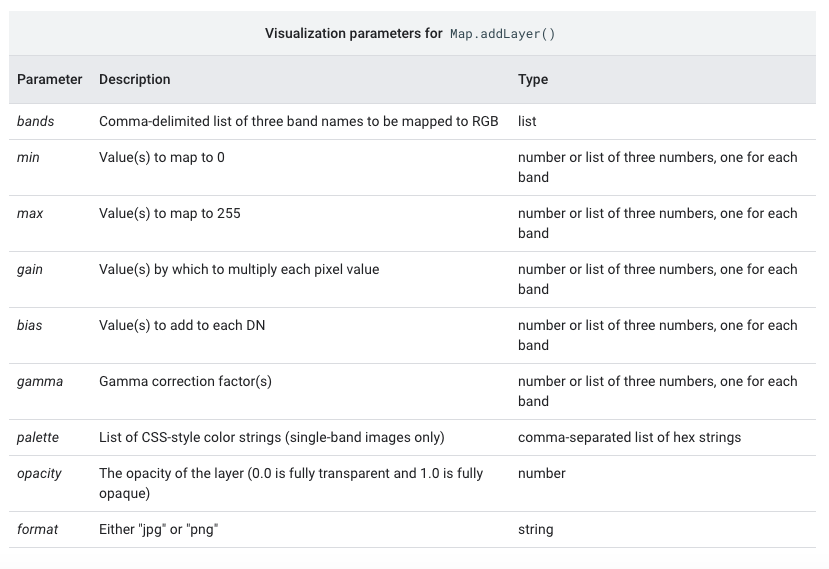


The visualization parameters are set up within curly brackets (braces) with the following set up:



In [ ]:
visParams = {
 'bands': ['B4', 'B3', 'B2'],
 'min': 0,
 'max': 5000,
 }

There are also two main ways to set the map view, so that we don't have to drag and zoom in to see our layer.

`Map.setCenter(longitude,latitiude,zoomlevel)`

and

`Map.centerObject(object,zoomlevel)`

Now we can use those to visualize our Landsat 8 image.

In [ ]:
Map = geemap.Map()
# Centre the map on the point
Map.centerObject(uOttawa, 8)

# Here we set it up so that band4 is in Red, B3 is in Green, and B2 is in Blue
visParams = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
  'gamma': 1.4,
}

# Add the scene to the map with the visualization parameters created above
Map.addLayer(L8_2020June6, visParams)
Map.addLayerControl()

#Done!  now you can zoom/pan and look at the image you have requested.
Map

###| 5. Cloud masking

The first image in our image collection is really cloudy, you can't even see uOttawa at all!

There are a couple of ways to get around the clouds. Instead of using the first image in our image collection, we could instead sort it to get the least cloudy image.


In [ ]:
# Sort the collection by cloud cover and then take the first (the least cloudy)
leastcloudy = L8_uOttawa_S2020.sort('CLOUD_COVER').first()

# Check how much cloud cover the least cloudy image has
imageprops = geemap.image_props(leastcloudy)
print(imageprops.get('CLOUD_COVER').getInfo())

This is great if we aren't picky about the date or we just want to take a quick look at the area but if we need to analyze the image, we will need to mask out the clouds. 

There are several different ways to mask clouds, and different options for each sensor. For Landsat, one useful method to mask out clouds is by using the pixel quality assurance band. The quality assurance band `pixel_qa` contains information about the quality of each pixel. These methods select any pixels that are “bad” and mask them out.

If you're interested and want more information on how the qa bands work, check out [this](https://www.google.com/url?q=https://www.usgs.gov/land-resources/nli/landsat/landsat-sr-derived-spectral-indices-pixel-quality-band&sa=D&source=editors&ust=1613500103309000&usg=AOvVaw0ZJKTwxW03RKzPTPRUYO4r) and [this](https://hyspeedblog.wordpress.com/2014/08/27/working-with-landsat-8-using-and-interpreting-the-quality-assessment-qa-band/). 

For now, it's not super necessary to understand how this function works. Both the L8 and the L457 cloud masks used in this lab were taken directly from the Google example scripts (see the end of [this page](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR) to find the L8 cloud masking function).


In [ ]:
# Create a function to mask out clouds in Landsat 8 images
## This one is taken from GEE example scripts

def cloudMaskL8(image):
  # Bits 3 and 5 are cloud shadow and cloud, respectively.
  cloudShadowBitMask = 1 << 3 #select the cloud shadow bit location
  cloudsBitMask = 1 << 5 # select the cloud bit location
  # Get the pixel QA band.
  qa = image.select('pixel_qa')
  # Both flags should be set to zero, indicating clear conditions.
  # this only keeps pixels were both the cloud and cloud shadow bits are set to 0
  mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(qa.bitwiseAnd(cloudsBitMask).eq(0))
  # Return the masked image, not scaled to reflectance, with the QA bands.
  return image.updateMask(mask)

We can run this function on a single image, or 'map' it across an entire image collection. In the latter case, the function is applied to every single image in the image collection. This is useful if later you want to reduce a stack of images into a single image composite or an image mosaic (which we will do in another lab!)

In [ ]:
# On a single image
CF_06062020 = cloudMaskL8(L8_2020June6)

# On an image collection
CF_Summer2020 = L8_uOttawa_S2020.map(cloudMaskL8)

Check out what the cloud masked image looks like

In [ ]:
Map = geemap.Map()
Map.addLayer(CF_06062020,visParams)
Map.centerObject(uOttawa,8)
Map.addLayerControl()
Map

## Review


### Combine into one cell

Once you get the hang of what each chunk of code does, all of these steps can easily be combined into one code cell. 

In [ ]:
# Import the image collection and create any geometries you will need later

L7 = ee.ImageCollection("LANDSAT/LE07/C01/T1_SR")

# This function creates my aoi (area of interest) around central Ottawa
## NB: if your polygon covers more than one scene, your collection will include all those images,
## not just the ones that overlap
aoi = ee.Geometry.Polygon([[-75.74,45.43],
                           [-75.65,45.43], 
                           [-75.65,45.39], 
                           [-75.74,45.39], 
                           [-75.74,45.43]])

# Define all the functions you will apply or 'map' across your image collection

def cloudMaskL457(image):
  qa = image.select('pixel_qa')
  # If the cloud bit (5) is set and the cloud confidence (7) is high
  # or the cloud shadow bit is set (3), then it's a bad pixel.
  cloud = qa.bitwiseAnd(1 << 5) \
                  .And(qa.bitwiseAnd(1 << 7))
  mask2 = image.mask()
  return image.updateMask(cloud.Not()).updateMask(mask2)

# Filter the image collection
# this filter function allows us to select dates from >1 time period
# Because I just want to see a single image, I will use .sort() and .first()
# to get the least cloudy image from the stack
L7_Ot_LC_Summer0506 = L7.filterBounds(aoi)\
                  .filter(ee.Filter.Or(ee.Filter.And(ee.Filter.date('2005-06-01', '2005-08-31')),
                  ee.Filter.And(ee.Filter.date('2006-06-01', '2006-08-31')))) \
                  .map(cloudMaskL457) \
                  .sort("CLOUD_COVER") \
                  .first() \
                  .clip(aoi) #this only works on an image, not an image collection

# View the result
visParams = {
  'bands': ['B3', 'B2', 'B1'],
  'min': 0,
  'max': 3000,
  'gamma': 1.4,
}
Map = geemap.Map()
Map.addLayer(L7_Ot_LC_Summer0506,visParams)
Map.centerObject(aoi,13)
Map.addLayerControl()
Map

# Hello scan line failure, my old friend.


### Earth Engine Javascript Code Editor

Now that you have the hang of how to use google earth engine in python, follow this [link](https://code.earthengine.google.com/d0edd045ddb2e4c33b4fd7f5767b8cc1?noload=true) to take a look at how the same code works in the Javascript GEE Code Editor (you have to zoom in to Ottawa to see the result).

*   What are the differences? 

*   What happens when you print?
*   Hover over the imports of the image collection and the AOI - what happens if you click convert?

While you're there, take a look at the 'docs' tab on the left hand side and the 'inspector' tab on the right hand side. What are they? What do they do?


## Questions to Submit
Answer the following questions in the space provided. Feel free to add additional code and text cells as needed. Make sure to show all of your code.

**In all cases**, if you use code chunks from another source (not a bad thing), make sure to reference where you found them.



### Q1
What are 4 different ways you can filter an image collection? Show how you could use those 4 methods to filter the Landsat 7 collection.

In [ ]:
## Show your code here

### Q2
Examine an image from Landsat 5 Surface Reflectance Tier 1 collection over uOttawa from April 2011 (hint: start [here](https://developers.google.com/earth-engine/datasets/catalog/landsat-5)). Answer the following questions and show your code: 
1. How many bands does it have? 
2. What is the solar zenith angle? 
3. What percent cloud cover does it have? 
4. What is the path and row of the image? 
5. What date was the image taken? 
6. How many images are in the L5 collection over uOttawa in April 2011?

In [ ]:
## Show your code here

### Q3
Name and explain 3 differences between the python (in Colab) and javascript (in GEE code editor) environments and/or code structure.

// Answer here

### Q4
Show the least cloudy 'Vegetation Analysis' false colour (SWIR1-NIR-BLUE as RGB) Landsat 8 image over Banff National Park from August 2014

In [ ]:
## Show your code here

### Q5
Explore the Google Earth Engine data catalog and display an image on a map from any collection we haven't used in this lab, i.e. anything other than Landsat 5,7 and 8. Make sure to use visualization parameters that work for your image (you may need to do some trial and error or some research to find what works).




In [ ]:
## Show your code here